# Using the NDBC Buoy Data Scraper
The Buoy class is used to get realtime and historical data from [NDBC Buoys](https://www.ndbc.noaa.gov/)  
[Realtime Buoy Data](#Realtime-data-from-the-Neah-Bay-buoy)  
[Historical Buoy Data](#Historical-data)

In [1]:
from buoyscraper import Buoy

## Realtime data from the Neah Bay buoy

In [2]:
neah_bay_id = 46087
neah = Buoy(neah_bay_id)
#print(neah)  # Prints metadata

In [3]:
neah.get_realtime("not a valid dtype")

Possible realtime dtypes are: ['stdmet', 'adcp', 'cwind', 'supl', 'spec', 'data_spec', 'swdir', 'swdir2', 'swr1', 'swr2', 'ocean', 'srad']


In [4]:
# Get stdmet data
neah_stdmet = neah.get_realtime("stdmet")
neah_stdmet.head(3)

columns,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE
datetime,,,,,,,,,,,,,,
2019-10-27 16:20:00+00:00,80.0,4.0,5.0,1.8,11,8.0,293,1032.9,8.4,10.0,3.9,NaN,NaN,NaN
2019-10-27 15:50:00+00:00,60.0,4.0,6.0,1.9,11,8.1,300,1032.6,8.7,10.0,2.5,NaN,0.0,NaN
2019-10-27 15:20:00+00:00,60.0,4.0,5.0,2.0,11,8.8,291,1032.7,8.8,10.0,3.3,NaN,NaN,NaN


In [5]:
# Check the units for realtime stdmet
help(neah.realtime.stdmet)

Help on method stdmet in module buoyscraper.realtime_scraper:

stdmet(url) method of buoyscraper.realtime_scraper.RealtimeScraper instance
    Standard Meteorological Data
    dtype:   "stdmet"
    index:   datetime64[ns, UTC]
    columns: WDIR  WSPD  GST  WVHT  DPD  APD  MWD  PRES  ATMP  WTMP  DEWP  VIS  PTDY  TIDE
    units:   degT  m/s   m/s   m    sec  sec  degT  hPa  degC  degC  degC  nmi  hPa    ft



In [6]:
# Realtime data has 45 days of data
max(neah_stdmet.index) - min(neah_stdmet.index)

Timedelta('45 days 16:00:00')

**Save and load realtime data**  
Note: If a pickle for a ```dtype``` and ```buoy_id``` already exists in the default (or specified) data directory, *it will be updated with any new data!*

In [9]:
neah.save_realtime(["stdmet", "data_spec"])
#neah.save_realtime()  # Save all available data types

Added 0 new items to buoydata/46087/realtime/stdmet.pkl
Added 0 new items to buoydata/46087/realtime/data_spec.pkl


In [10]:
neah_stdmet = neah.load_realtime("stdmet")

**Plotting the realtime wave height and dominant period for the Neah Bay buoy**

/Users/jonahgolden/anaconda3/envs/deep-learning/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


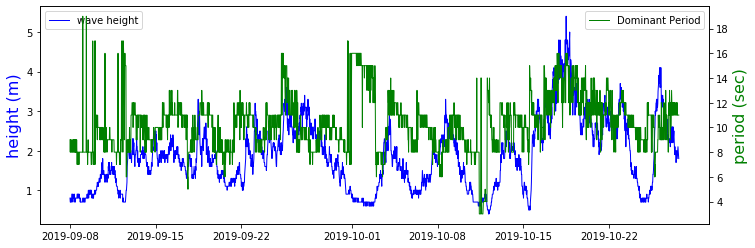

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()
ax1.plot(neah_stdmet['WVHT'], 'b-', linewidth=1, label='wave height')
ax1.set_ylabel('height (m)', color='b', size=16)
ax1.legend(loc="upper left")
ax2.plot(neah_stdmet['DPD'], 'g-', linewidth=1, label='Dominant Period')
ax2.set_ylabel('period (sec)', color='g', size=16)
ax2.legend()
plt.show()

## Historical data
Accessing historical data mostly works the same as realtime data.  The main difference is the data that are available.

In [12]:
from buoyscraper import Buoy

In [13]:
neah_bay_id = 46087
neah = Buoy(neah_bay_id)
neah.get_historical("not a valid dtype")

Possible historical dtypes are: ['stdmet', 'swden', 'swdir', 'swdir2', 'swr1', 'swr2', 'adcp', 'cwind', 'ocean', 'dart']


In [14]:
# Get swell density data
neah_swden = neah.get_historical("swden")
print(len(neah_swden))
neah_swden.head(3)

122361


frequencies,.0200,.0325,.0375,.0425,.0475,.0525,.0575,.0625,.0675,.0725,...,.3300,.3400,.3500,.3650,.3850,.4050,.4250,.4450,.4650,.4850
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.71,...,0.01,0.02,0.03,0.04,0.07,0.08,0.04,0.09,0.04,0.02
2007-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.58,3.14,...,0.02,0.05,0.03,0.07,0.12,0.14,0.05,0.04,0.03,0.01
2007-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.19,...,0.03,0.04,0.07,0.07,0.09,0.07,0.05,0.04,0.03,0.03


In [15]:
# Check the units
help(neah.historical.swden)

Help on method swden in module buoyscraper.historical_scraper:

swden(url) method of buoyscraper.historical_scraper.HistoricalScraper instance
    Spectral wave density
    dtype:   "swden"
    index:   datetime64[ns, UTC]
    columns: .0200  .0325  .0375  ...  .4450  .4650  .4850 (frequencies in Hz)
    units:   Spectral Wave Density/Energy in m^2/Hz for each frequency bin



In [16]:
# Another buoy
new_dungeness_id = 46088
dunge = Buoy(new_dungeness_id)
dunge_swden = dunge.get_historical("swden")

**Plotting the historical spectral density means at the New Dungeness and Neah Bay buoys**  
* Check the Neah Bay axis. Spectral densities in Neah Bay are way higher than New Dungeness. The Neah Bay buoy is on the West coast of Washington, while the New Dungeness buoy is in The Straight of Juan de Fuca.
* Frequencies are lower at Neah, because it gets more ocean swell, while New Dungeness gets more wind swell.
* Dungeness has a noticeable bump right around the 0.1 Hz frequenciy, the same frequencies that are most prevelant at Neah. Some ocean swell makes it in The Straight of Juan de Fuca to Dungeness.

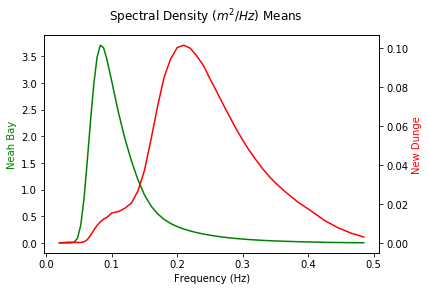

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

frequencies = [float(hz) for hz in list(dunge_swden)]
neah_spectral_means = neah_swden.sum(axis=0)/len(neah_swden)
dunge_spectral_means = dunge_swden.sum(axis=0)/len(dunge_swden)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(frequencies, neah_spectral_means, 'g-')
ax2.plot(frequencies, dunge_spectral_means, 'r-')
ax1.set_ylabel('Neah Bay', color='g')
ax2.set_ylabel('New Dunge', color='r')
fig.suptitle("Spectral Density $(m^2/Hz)$ Means")
ax1.set_xlabel('Frequency (Hz)')
plt.show()